
# Introduction to Scikit-Learn (sklearn)

This notebook demostrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready.
2. Chosse the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [1]:
what_were_covering = ['0. An end-to-end Scikit-Learn workflow',
                      '1. Getting the data ready',
                      '2. Chosse the right estimator/algorithm for our problems',
                      '3. Fit the model/algorithm and use it to make predictions on our data',
                      '4. Evaluating a model',
                      '5. Improve a model',
                      '6. Save and load a trained model',
                      '7. Putting it all together!']

## 0. An end-to-end Scikit-Learn workflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Get the data ready
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing_df = pd.DataFrame(housing['data'],
                          columns=housing['feature_names'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
housing_df["target"] =  housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Dataset Defination:**

* MedInc median income in block group
* HouseAge median house age in block group
* AveRooms average number of rooms per household
* AveBedrms average number of bedrooms per household
* Population block group population
* AveOccup average number of household members
* Latitude block group latitude
* Longitude block group longitude

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

In [ ]:
# Managing Warnings.
# import warnings
# warnings.filterwarnings("ignore")

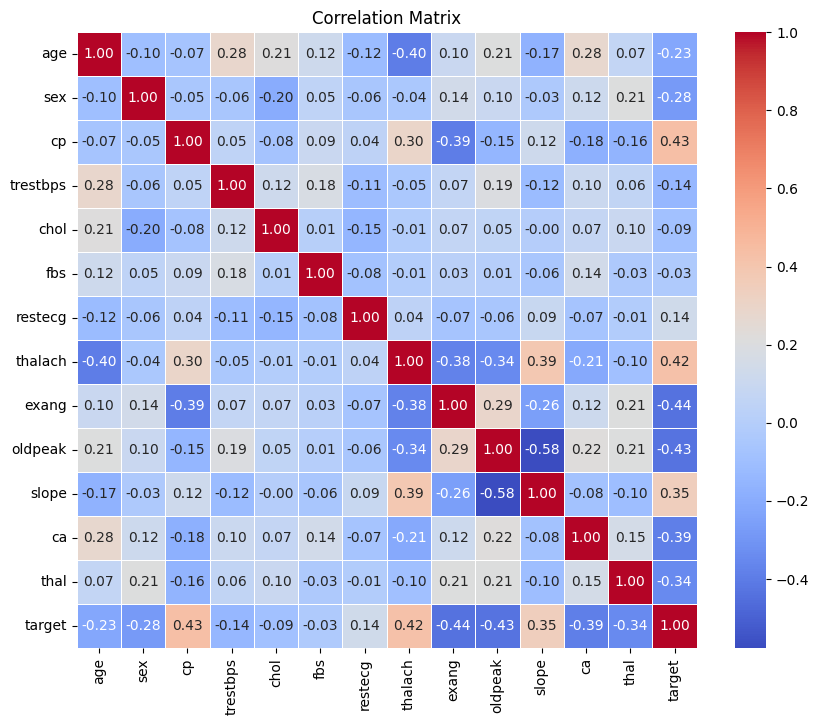

In [3]:
corr_matrix = heart_disease.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Create x (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease['target']

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# Make predictions.

In [9]:
y_pred = clf.predict(X_test)

y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [10]:
# 4. Evaluate the model on the training data and test data.
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.8524590163934426

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_pred):.3f}")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.852
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.84      0.91      0.88        35

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [13]:
print(f"Concusion matrix:\n {confusion_matrix(y_test, y_pred)}")

Concusion matrix:
 [[20  6]
 [ 3 32]]


In [14]:
(26+26)/(25+26+7+2)

0.8666666666666667

In [15]:
import numpy as np

In [16]:
# 5. Improve a model.
# Try different amount of n_estimators.
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators .....")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%")

Trying model with 10 estimators .....
Model accuracy on test set: 75.41%
Trying model with 20 estimators .....
Model accuracy on test set: 85.25%
Trying model with 30 estimators .....
Model accuracy on test set: 75.41%
Trying model with 40 estimators .....
Model accuracy on test set: 81.97%
Trying model with 50 estimators .....
Model accuracy on test set: 83.61%
Trying model with 60 estimators .....
Model accuracy on test set: 83.61%
Trying model with 70 estimators .....
Model accuracy on test set: 83.61%
Trying model with 80 estimators .....
Model accuracy on test set: 86.89%
Trying model with 90 estimators .....
Model accuracy on test set: 81.97%


In [17]:
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)
print(f"Model Accuracy on train data: {model.score(X_train, y_train)*100:.2f}%")
print(f"Model Accuracy on test data: {model.score(X_test, y_test)*100:.2f}%")

Model Accuracy on train data: 100.00%
Model Accuracy on test data: 80.33%


In [33]:
# 6. Save a model and load it
import pickle
pickle.dump(model, open("random_forest_model_87.pk1", "wb"))

In [19]:
# Loading model
import pickle

loaded_model = pickle.load(open("random_forest_model_87.pk1", "rb"))
loaded_model.score(X_test, y_test)

0.8688524590163934

In [20]:
confusion_matrix(y_test, y_pred)

array([[23,  8],
       [ 8, 22]], dtype=int64)

In [21]:
(26+26)/(26+26+9)

0.8524590163934426

In [22]:
y_pred = model.predict(X_test)

In [23]:
confusion_matrix(y_test, y_pred)

array([[24,  7],
       [ 7, 23]], dtype=int64)

In [24]:
(25+27)/(25+27+9)

0.8524590163934426

In [25]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.7704918032786885

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        31
           1       0.77      0.77      0.77        30

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3


# 1. Getting our data ready to be used with machine learning.

Three main things we have to do:

    1. Split the data into features and labels (usually 'x' & 'y')
    2. FIlling (also called imputing) or disregarding missing values.
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# Split the data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [9]:
X.shape

(303, 13)

# 1.1 Make sure data's are all in numerical 

In [3]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
car_sales.shape

(1000, 5)

In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [6]:
# Spliting into X & Y.
X = car_sales.drop("Price", axis=1)
y = car_sales['Price']

# Splitting into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Building machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [8]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
car_sales['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [10]:
# COnverting string values to numbers.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [11]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [12]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [13]:
transformed_X.dtype

dtype('float64')

In [14]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]], dtype=float)
# dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])

dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
996,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# Let's refit the model.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
model.score(X_test, y_test)

0.3235867221569877

In [17]:
y_pred = model.predict(X_test)

In [ ]:
# More Evaluation techniques.
# These evaluation metrics can only be used with the classification problems
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Accuracy Score: {accuracy_score(y_true = y_test, y_pred = y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [19]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

MAE 6012.4608
MSE 61830483.959232


## 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove teh samples with missing data altogether.

In [3]:
# Import car sales missing data.
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [24]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [26]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
# Create X & y.
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [29]:
car_sales_missing['Doors'].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

## Option 1. Fill missing data with Pandas

In [44]:
# Fill the "Make" column.
car_sales_missing['Make'].fillna("missing", inplace=True)

# Fill the "Colour" column.
car_sales_missing['Colour'].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column.
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the "Doors" column.
car_sales_missing["Doors"].fillna(4, inplace=True)

In [45]:
# Checking the dataframe again.
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# Remove rows with missing price value.
car_sales_missing.dropna(inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [52]:
car_sales_missing.shape

(950, 5)

In [53]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [54]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [58]:
# Converting our datas to numbers.
# Turn the categories into numbers.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = 'passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


 # Fill Missing values with scikit-learn

In [4]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [9]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
# Drop the rows with no labels.

car_sales_missing.dropna(subset=['Price'], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [5]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           903 non-null    object 
 1   Colour         904 non-null    object 
 2   Odometer (KM)  902 non-null    float64
 3   Doors          903 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


In [6]:
# Split data into X & y.
X = car_sales_missing.drop('Price', axis= 1)
y = car_sales_missing['Price']

In [7]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

## Filling missing values with scikit-learn

In [8]:
# FIll missing values with scikit-learn.
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean.
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns.
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [10]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=['Make', 'Colors', 'Doors', 'Odomoeter (KM)'])
car_sales_filled.head()

,Make,Colors,Doors,Odomoeter (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [11]:
car_sales_filled.isna().sum()

Make              0
Colors            0
Doors             0
Odomoeter (KM)    0
dtype: int64

In [13]:
car_sales_filled.shape

(950, 4)

In [14]:
# COnverting categorical datas into numerical values.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colors', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                 categorical_features)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [23]:
# Now we've got out data as number and filled no missing values.
np.random.seed(88)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=75)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.12237464047473123

In [26]:
len(car_sales_filled), len(car_sales)

(950, 1000)

# Chossing the right estimator/algorithm for the problem

**Some things to note:**
* Sklearn refers to machine learning models, alogrithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator.
* Regression problem - Predicting a number (selling price of a car)

 # 2.1 Picking a machine learning model for a Regression problem
    
Let's use the California Housing dataset

In [36]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [37]:
# Data preparation for the algorithm/estimator .

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [39]:
# Importing model
from sklearn.linear_model import Ridge

# Initiate and fit the model on the test set.
model = Ridge()
model.fit(X_train, y_train)

# Evaluation of model
model.score(X_test, y_test)

0.5758549611440127

In [40]:
# Importing model
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2841671821008396

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Check the score
model.score(X_test, y_test)

0.8065734772187598

 # 2.2 Picking a machine learning model for a Classification problem
    
Let's use the iris dataset

In [6]:
# Importing dataset
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
iris_df = pd.DataFrame(iris['data'], columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris_df['species'] = iris['target']

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
iris_df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

### working on heart disaese dataset

In [9]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Import the linearSVC estimator 
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the model.
clf.score(X_test, y_test)

C:\Users\Raju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model.
model.score(X_test, y_test)


0.8524590163934426

# 3. Fit the model/algorithm on our data and use it to make predictions.

### 3.1 Fitting the model

In [7]:
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model.
model.score(X_test, y_test)


0.8524590163934426

### 3.2 Make predictions using a model

In [8]:
y_preds = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [10]:
# Predictions with predict.
y_preds[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [10]:
# Evaluation with prdict_probab
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [12]:
%who_ls DataFrame

['X', 'X_test', 'X_train', 'heart_disease']

In [13]:
housing_df.head()

NameError: name 'housing_df' is not defined

In [ ]:
housing_df.drop('MedHouseVal', axis=1, inplace=True)

In [13]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Train the model.
model.fit(X_train, y_train)

# Predictions from the model
y_preds = model.predict(X_test)

In [13]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [14]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [11]:
len(y_preds), len(y_test)

(4128, 4128)

In [12]:
# Compare teh predcitions to the truth.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method.
2. The `scoring` parameter.
3. Problem-specific metric functions.

 ## 4.1 Evaluating a model with the score method.

In [15]:
heart_disease.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


In [11]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create Data for the model.
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# Create train/test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define model
model = RandomForestClassifier()

# Train the model.
model.fit(X_train, y_train)

# Predictions from the model.
y_preds = model.predict(X_test)

In [12]:
model.score(X_train, y_train)

1.0

In [13]:
model.score(X_test, y_test)

0.8524590163934426

In [14]:
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

### Using `score()` method on our regression model.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=50)

# Train the model.
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [16]:
# The default score() evaluation metric is r_squared for regression algorithms.
model.score(X_test, y_test)

0.8040661003828089

In [17]:
model.score(X_test, y_test)

0.8040661003828089

# 4.2 Evaluating a model using the `scoring` parameter

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create Data for the model.
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# Create train/test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define model
clf = RandomForestClassifier()

# Train the model.
clf.fit(X_train, y_train)

# Predictions from the model.
y_preds = clf.predict(X_test)

In [19]:
clf.score(X_test, y_test)

0.8524590163934426

#### Cross Validation Score

In [20]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [21]:
np.random.seed(42)

# Single training and test split score
clf_single_core = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score.
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# COmpare the two.
clf_single_core, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [22]:
# Scoring parameter set to NOne by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

**Accuracy**

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [24]:
 np.mean(cross_val_score)

0.8248087431693989

In [25]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's True Positive Rate (TPR) versus a models False Positive Rate (FPR).
* True Positive = model predicts 1 when truth is 1.
* False Positive = model predicts 1 when truth is 0.
* True negative = model predicts 0 when truth is 0.
* Falase negative = model predicts 0 when truth is 1.

In [26]:
from sklearn.metrics import roc_curve

np.random.seed(42)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)

y_probs[:4]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16]])

In [27]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [33]:
# Calculate FPT, TPR and thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [31]:
# Create a functin for plotting ROC curves.
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (FPR) and true positive rate (TPR) of a model.
    """
    plt.plot(fpr, tpr, color='orange', label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristics (ROC) CUrve")
    plt.legend()
    plt.show()

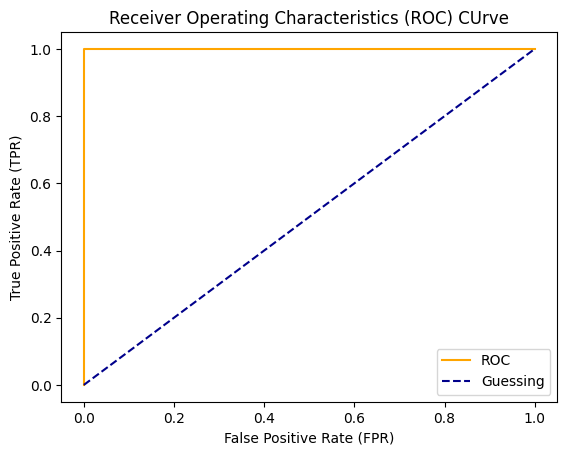

In [32]:
plot_roc_curve(fpr, tpr)

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

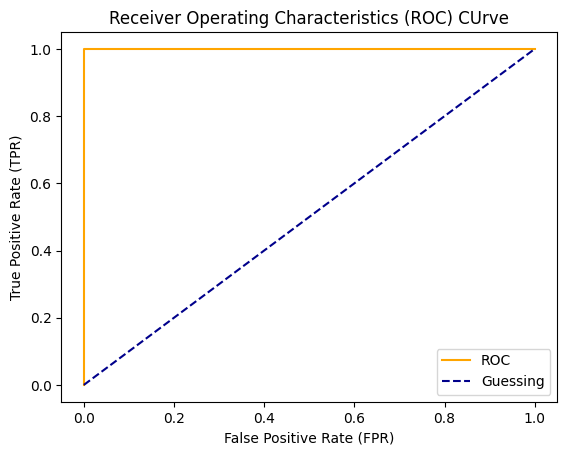

In [34]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [35]:
roc_auc_score(y_test, y_test)

1.0

## Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [36]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [37]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted labels'])

Predicted labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [38]:
pd.crosstab(y_test, y_preds)

col_0,0,1
target,,
0,24,5
1,4,28


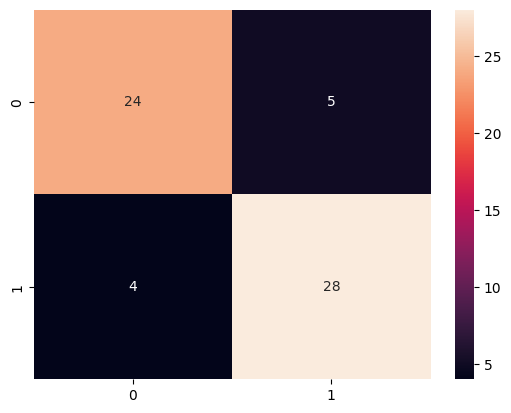

In [42]:
# Make our confusion matrix more visible with seaborn.

# Set the font scale.
# plt.figure(figsize=(2,1.5))
# sns.set(font_scale=1.5)

# Create a confusion matrix.
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat, annot=True);

In [35]:
clf

RandomForestClassifier()

In [39]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

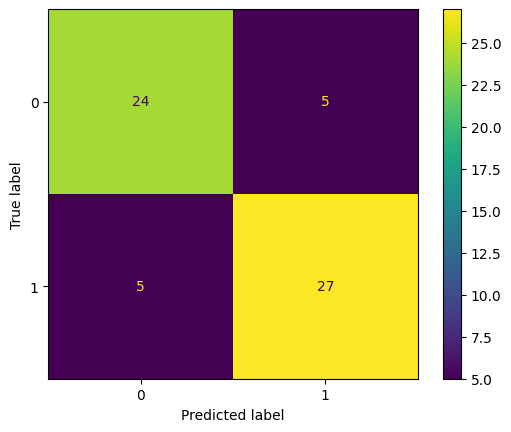

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

## Classification Report

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



**To Summarize Classification Metics:**

* **Accuracy** is a good measure to start with if all classes are balanced.
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive prediction are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

## Regression Model Evaluation metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficent of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
model.score(X_test, y_test)

0.8065734772187598

In [16]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
y_test.mean()

2.0550030959302323

In [18]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [19]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [49]:
 r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [51]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

## Mean Absolute Error (MAE)

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [20]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [21]:
df = pd.DataFrame(data={'Actual values': y_test,
                        'Predicted values': y_preds})
df['difference'] = df['Predicted values'] - df['Actual values']
df.head()

,Actual values,Predicted values,difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [22]:
df['difference'].mean()

0.012048392126937589

In [23]:
np.abs(df['difference']).mean()

0.32659871732073664

In [24]:
np.abs(3)

3

# Mean Squared Error (MSE)
MSE is the mean of the square of the errors between actual and predicted values.

In [25]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mean_squared_error(y_test, y_preds)

0.2534678520824551

In [27]:
df = pd.DataFrame({"Actual Values": y_test, "Predicted Values": y_preds, "Difference": y_preds - y_test})
df.head()

,Actual Values,Predicted Values,Difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [28]:
df['Difference'].mean()

0.012048392126937589

In [29]:
np.square(df['Difference']).mean()

0.2534678520824551

## 4.2.3 Finally using `scoring` parameter

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
np.random.seed(42)
# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring=None) # If scoring is None then default score is used.
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [35]:
# Cross Validated Accuracy
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


### Using scoring parameter

In [38]:
# Accuracy Score
np.random.seed(42)
# Cross-validation accuracy
cv_score = cross_val_score(clf, X, y, cv = 5, scoring='accuracy')
print(cv_score)
print(f"The cross validated accuracy is: {np.mean(cv_score)*100:.2f}%")

[0.81967213 0.90163934 0.83606557 0.78333333 0.78333333]
The cross validated accuracy is: 82.48%


In [39]:
# Precision Score
np.random.seed(42)
cv_score = cross_val_score(clf, X, y, cv = 5, scoring='precision')
print(cv_score)
print(f"The cross validated precision is: {np.mean(cv_score)*100:.2f}%")

[0.82352941 0.93548387 0.84848485 0.79411765 0.76315789]
The cross validated precision is: 83.30%


In [40]:
# Recall Score
np.random.seed(42)
cv_score = cross_val_score(clf, X, y, cv = 5, scoring='recall')
print(cv_score)
print(f"The cross validated recall is: {np.mean(cv_score)*100:.2f}%")

[0.84848485 0.87878788 0.84848485 0.81818182 0.87878788]
The cross validated recall is: 85.45%


### Scoring parameter for a regression problem.

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor()

In [42]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [43]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [45]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4626304189468596

In [46]:
cv_mae

array([-0.51816064, -0.33163551, -0.53809511])

In [47]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.4612318847966544

In [48]:
cv_mse

array([-0.51325643, -0.32925916, -0.54118007])

 ### 4.3 Using different evaluation metrics as Scikit-Learn Function
The 3rd way to evalueate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module.

In [8]:
# For classification problem.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_preds)*100:.2f}%")

Accuracy Score: 85.25%
Precision Score: 84.85%
Recall Score: 87.50%
F1 Score: 86.15%


In [9]:
# For regression problem.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"Mean Absolute Score: {mean_absolute_error(y_test, y_preds)*100:.2f}%")
print(f"Mean Squared Score: {mean_squared_error(y_test, y_preds)*100:.2f}%")

R2 Score: 80.66%
Mean Absolute Score: 32.66%
Mean Squared Score: 25.35%


In [9]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Chosse the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 5. Improving a model.
First predictions = baseline predictions.
First model = baseline model.

**From a data perspective:**
* Could we collect more data? Generally the more data the better.
* Could we improve our data?

**From a model perspective:**
* Is there a better model we could use?
* Could we improve the current model?

**Hyperparameters vs. parameters**
* Parameters = model find these patters in data
* Hyperparameters = settings on a model you can adjust to potentially improve its ability to find patterns.

**Three ways to adjust hyperparameters:**
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Getting hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning Hyperparameters by Hand

Let's make 3 sets, training, validation and test.

In [59]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [7]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true vs y_preds labels on a classification problems.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall : {recall*100:.2f}%")
    print(f"F1: {f1*100:.2f}%")

    return metric_dict

In [10]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(52)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y.
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets.
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data.
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data.
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]
# len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions on validate data set.
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set.
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 75.56%
Precision: 67.86%
Recall : 90.48%
F1: 77.55%


{'accuracy': 0.76, 'precision': 0.68, 'recall': 0.9, 'f1': 0.78}

In [11]:
np.random.seed(42)

# Creatign a second model with different hyperparameters.
clf_2 = RandomForestClassifier(n_estimators=24)
clf_2.fit(X_train, y_train)

# Predictions with second model.
y_preds = clf_2.predict(X_valid)

# Evaluating with second model.
clf_2_metrics = evaluate_preds(y_valid, y_preds)
clf_2_metrics

Accuracy: 86.67%
Precision: 82.61%
Recall : 90.48%
F1: 86.36%


{'accuracy': 0.87, 'precision': 0.83, 'recall': 0.9, 'f1': 0.86}

In [12]:
np.random.seed(42)

# Creatign a third model with different hyperparameters.
clf_3 = RandomForestClassifier(n_estimators=25)
clf_3.fit(X_train, y_train)

# Predictions with third model.
y_preds = clf_3.predict(X_valid)

# Evaluating with third model.
clf_3_metrics = evaluate_preds(y_valid, y_preds)
clf_3_metrics

Accuracy: 86.67%
Precision: 82.61%
Recall : 90.48%
F1: 86.36%


{'accuracy': 0.87, 'precision': 0.83, 'recall': 0.9, 'f1': 0.86}

In [64]:
for i in range(10, 100, 10):
    np.random.seed(42)
    loop_clf = RandomForestClassifier(n_estimators=i)
    loop_clf.fit(X_train, y_train)
    y_preds = loop_clf.predict(X_valid)
    print(f"Accuracy Score on n_estimators{i}: {accuracy_score(y_valid, y_preds)}")

Accuracy Score on n_estimators10: 0.8222222222222222
Accuracy Score on n_estimators20: 0.8444444444444444
Accuracy Score on n_estimators30: 0.8444444444444444
Accuracy Score on n_estimators40: 0.8444444444444444
Accuracy Score on n_estimators50: 0.8444444444444444
Accuracy Score on n_estimators60: 0.8444444444444444
Accuracy Score on n_estimators70: 0.8444444444444444
Accuracy Score on n_estimators80: 0.8222222222222222
Accuracy Score on n_estimators90: 0.8222222222222222


In [68]:
# Try different amount of n_estimators.
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators .....")
    new_clf = RandomForestClassifier(n_estimators=i)
    new_clf.fit(X_train, y_train)
    y_preds = new_clf.predict(X_valid)
    print(f"Model accuracy on test set: {accuracy_score(y_valid, y_preds)*100:.2f}%")

Trying model with 10 estimators .....
Model accuracy on test set: 82.22%
Trying model with 20 estimators .....
Model accuracy on test set: 82.22%
Trying model with 30 estimators .....
Model accuracy on test set: 82.22%
Trying model with 40 estimators .....
Model accuracy on test set: 77.78%
Trying model with 50 estimators .....
Model accuracy on test set: 75.56%
Trying model with 60 estimators .....
Model accuracy on test set: 80.00%
Trying model with 70 estimators .....
Model accuracy on test set: 75.56%
Trying model with 80 estimators .....
Model accuracy on test set: 80.00%
Trying model with 90 estimators .....
Model accuracy on test set: 80.00%


In [72]:
np.random.seed(42)
for i in range(10, 100, 10):
    # Creatign a third model with different hyperparameters.
    clf_3 = RandomForestClassifier(n_estimators=i)
    clf_3.fit(X_train, y_train)

    # Predictions with third model.
    y_preds = clf_3.predict(X_valid)

    # Evaluating with third model.
    print(f"Trying model with {i} estimators .....")
    clf_3_metrics = evaluate_preds(y_valid, y_preds)
    clf_3_metrics

Trying model with 10 estimators .....
Accuracy: 82.22%
Precision: 80.95%
Recall : 80.95%
F1: 80.95%
Trying model with 20 estimators .....
Accuracy: 82.22%
Precision: 76.00%
Recall : 90.48%
F1: 82.61%
Trying model with 30 estimators .....
Accuracy: 82.22%
Precision: 78.26%
Recall : 85.71%
F1: 81.82%
Trying model with 40 estimators .....
Accuracy: 77.78%
Precision: 70.37%
Recall : 90.48%
F1: 79.17%
Trying model with 50 estimators .....
Accuracy: 75.56%
Precision: 67.86%
Recall : 90.48%
F1: 77.55%
Trying model with 60 estimators .....
Accuracy: 80.00%
Precision: 73.08%
Recall : 90.48%
F1: 80.85%
Trying model with 70 estimators .....
Accuracy: 75.56%
Precision: 70.83%
Recall : 80.95%
F1: 75.56%
Trying model with 80 estimators .....
Accuracy: 80.00%
Precision: 75.00%
Recall : 85.71%
F1: 80.00%
Trying model with 90 estimators .....
Accuracy: 80.00%
Precision: 73.08%
Recall : 90.48%
F1: 80.85%


In [19]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [13]:
from sklearn.model_selection import RandomizedSearchCV
grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

# Split into X & y.
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
# n_iter is number of models/parameters to try.
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [14]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 5}

In [18]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions.
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 78.69%
Precision: 75.00%
Recall : 87.10%
F1: 80.60%


### 5.3 Hyperparameter Tuning with GridSearchCV

In [17]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [16]:
grid_2 = {'n_estimators': [100, 200, 500],
           'max_depth': [None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_split': [6],
           'min_samples_leaf': [1, 2]}

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import GridSearchCV
grid_2 = {'n_estimators': [100, 200, 500],
           'max_depth': [None],
           'max_features': ['log2', 'sqrt'],
           'min_samples_split': [6],
           'min_samples_leaf': [1, 2]}

np.random.seed(42)

# Split into X & y.
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
# n_iter is number of models/parameters to try.
gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [20]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [19]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [20]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 80.33%
Precision: 77.14%
Recall : 87.10%
F1: 81.82%


**Comparing our models**

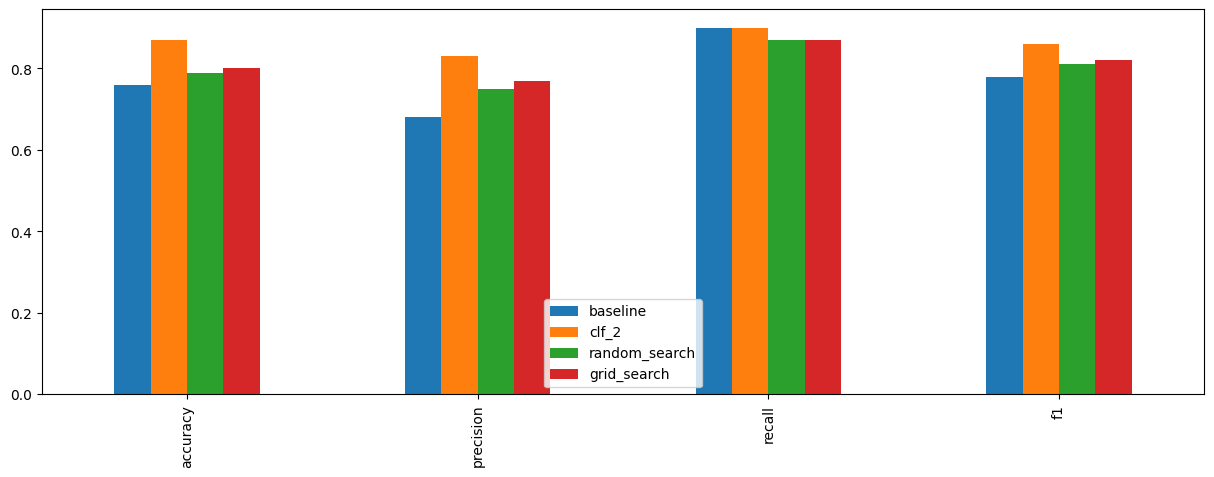

In [21]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random_search": rs_metrics,
                                "grid_search": gs_metrics})

compare_metrics.plot.bar(figsize=(15, 5));


## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module.
2. With the `joblib` module.

### With Pickle Module

#### Saving Model

In [23]:
import pickle

# Save an existing model to file.
pickle.dump(gs_clf, open("gs_random_forest_model1.pk1", "wb"))

#### Loading Model

In [24]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model1.pk1", "rb"))

In [25]:
# Make some predictions.
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 80.33%
Precision: 77.14%
Recall : 87.10%
F1: 81.82%


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.87, 'f1': 0.82}

#### Using `joblib`

In [27]:
from joblib import dump, load

# Save Model to file
dump(gs_clf, filename="gs_random_forest_model1.joblib")

['gs_random_forest_model1.joblib']

In [28]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model1.joblib")

# Make some predictions.
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 80.33%
Precision: 77.14%
Recall : 87.10%
F1: 81.82%


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.87, 'f1': 0.82}

## 7. Putting it all together!

In [7]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [9]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill Missing datas.
2. Convert data to numbers.
3. Build a model on the data."

In [7]:
# Getting data ready
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Set up random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels.
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
                                          ("onehot", OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_feature),
    ('num', numeric_transformer, numeric_features)
])


# Creating a preprocessing and modelling pipeline
model = Pipeline([('preprocessor', preprocessor),
                  ('model', RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with out `Pipeline`.

In [8]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": [1.0],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_spl

[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [1.0],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [23]:
gs_model.score(X_test, y_test)

0.33442701197658176

In [24]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 1.0,
 'model__min_samples_split': 4,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [34]:
data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64